# Ejercicio 4-PARTE 2

_*Nombre*_: Marcela cabrera

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter

In [1]:
from sklearn.datasets import fetch_20newsgroups

# Cargar el corpus de noticias sin cabeceras, pies de página y citas
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
newsgroupsdocs = newsgroups.data

In [3]:
print("="*70)
print("PREPARACIÓN INICIAL - CARGA Y PREPROCESAMIENTO")
print("="*70)


# Funciones de preprocesamiento
def normalize_text(text):
    text = text.lower()
    text = text.replace('\n', ' ').replace('\t', ' ')
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def remove_stopwords(tokens):
    stopwords = {
        "the", "is", "in", "and", "to", "of", "a", "for", "on", "that", "it",
        "this", "as", "with", "by", "an", "are", "from", "at", "be", "was",
        "or", "which", "we", "can", "has", "have", "will", "not", "if", "but",
        "about", "there", "their", "they", "you", "your", "our", "my", "me",
        "all", "also", "so", "what", "when", "where", "how", "who", "do", "does",
        "did", "would", "could", "should", "may", "might", "must", "been", "being",
        "am", "i"
    }
    return [word for word in tokens if word not in stopwords]

def simple_stem(word):
    word = re.sub(r'(ss|ies|s)$', '', word)
    word = re.sub(r'(ing|ed)$', '', word)
    word = re.sub(r'(er|est)$', '', word)
    word = re.sub(r'ly$', '', word)
    return word

def stem_tokens(tokens):
    return [simple_stem(token) for token in tokens]

def tokenize(text):
    return re.findall(r'\b[a-z]{2,}\b', text)

def preprocesamiento(text):
    tokens = tokenize(text)
    filtered = remove_stopwords(tokens)
    stemmed = stem_tokens(filtered)
    return stemmed

# Aplicar preprocesamiento
docs = [normalize_text(doc) for doc in newsgroupsdocs]
docs_procesados = [preprocesamiento(doc) for doc in docs]
docs_procesados_texto = [' '.join(doc) for doc in docs_procesados]

print(f"✓ {len(docs_procesados)} documentos preprocesados")

PREPARACIÓN INICIAL - CARGA Y PREPROCESAMIENTO
✓ 18846 documentos preprocesados


In [4]:
# Crear matrices TF y TF-IDF
vectorizer_tf = CountVectorizer()
matriz_tf = vectorizer_tf.fit_transform(docs_procesados_texto)

tfidf_vectorizer = TfidfVectorizer()
matriz_tfidf = tfidf_vectorizer.fit_transform(docs_procesados_texto)

print(f"✓ Matriz TF: {matriz_tf.shape}")
print(f"✓ Matriz TF-IDF: {matriz_tfidf.shape}")

✓ Matriz TF: (18846, 77651)
✓ Matriz TF-IDF: (18846, 77651)


In [18]:
# Obtener ranking TF-IDF para comparación posterior
consulta_ejemplo = "government secret conspiracy "
consulta_proc = preprocesamiento(consulta_ejemplo)
consulta_texto = ' '.join(consulta_proc)
vec_consulta_tfidf = tfidf_vectorizer.transform([consulta_texto])
scores_tfidf = cosine_similarity(vec_consulta_tfidf, matriz_tfidf).ravel()
ranking_tfidf = scores_tfidf.argsort()[::-1]

print(f"✓ Ranking TF-IDF calculado para consulta: '{consulta_ejemplo}'")

✓ Ranking TF-IDF calculado para consulta: 'government secret conspiracy '


PARTE 3: RANKING CON BM25

In [19]:
# PASO 1: Tokenización (ya realizada en el preprocesamiento)
print("\n✓ PASO 1: Tokenización")
print(f"primeros 30 tokens: {docs_procesados[0][:30]}")


✓ PASO 1: Tokenización
primeros 30 tokens: ['sure', 'some', 'bash', 'pen', 'fan', 'pretty', 'confus', 'lack', 'any', 'kind', 'post', 'recent', 'pen', 'massacre', 'devil', 'actual', 'bit', 'puzzl', 'too', 'bit', 'reliev', 'howev', 'go', 'put', 'end', 'non', 'pittsburgh', 'relief', 'bit', 'praise']


In [20]:
# PASO 2: Calcular longitudes de documentos y promedio de longitud
print("\n✓ PASO 2: Longitudes de documentos y promedio")
longitudes_doc = np.array([len(doc) for doc in docs_procesados])
longitud_media = longitudes_doc.mean()
print(f"   - Longitud mínima: {longitudes_doc.min()} tokens")
print(f"   - Longitud máxima: {longitudes_doc.max()} tokens")
print(f"   - Longitud promedio: {longitud_media:.2f} tokens")
print(f"   - Desviación estándar: {longitudes_doc.std():.2f} tokens")


✓ PASO 2: Longitudes de documentos y promedio
   - Longitud mínima: 0 tokens
   - Longitud máxima: 15012 tokens
   - Longitud promedio: 112.51 tokens
   - Desviación estándar: 400.85 tokens


In [21]:
# PASO 3: Calcular TF (frecuencia de término por documento)
print("\n✓ PASO 3: Matriz TF (Term Frequency)")
print(f"   - Términos únicos en el vocabulario: {len(vectorizer_tf.get_feature_names_out())}")

# Mostrar ejemplo de TF para un documento
doc_ejemplo = 0
tf_doc_ejemplo = matriz_tf[doc_ejemplo].toarray().ravel()
terminos = vectorizer_tf.get_feature_names_out()
indices_no_cero = tf_doc_ejemplo.nonzero()[0][:10]

print(f"\n   Ejemplo - Términos con mayor TF en documento {doc_ejemplo}:")
for idx in indices_no_cero:
    print(f"      '{terminos[idx]}': {tf_doc_ejemplo[idx]}")


✓ PASO 3: Matriz TF (Term Frequency)
   - Términos únicos en el vocabulario: 77651

   Ejemplo - Términos con mayor TF en documento 0:
      'actual': 1
      'any': 1
      'anyway': 1
      'bash': 1
      'beat': 1
      'bett': 1
      'bit': 3
      'bowman': 1
      'confus': 1
      'couple': 1


In [22]:
 #PASO 4: Calcular DF (document frequency) e IDF de BM25
print("\n✓ PASO 4: Document Frequency (DF) e IDF de BM25")
df_valores = np.array((matriz_tf > 0).sum(axis=0)).flatten()
N = matriz_tf.shape[0]

# Fórmula IDF de BM25: log((N - df + 0.5) / (df + 0.5) + 1)
idf_bm25 = np.log((N - df_valores + 0.5) / (df_valores + 0.5) + 1)

print(f"   - Total de documentos (N): {N}")
print(f"   - DF calculado para {len(df_valores)} términos")
print(f"   - IDF BM25 calculado")

# Mostrar ejemplos de IDF
print(f"\n   Ejemplos de términos con sus DF e IDF:")
terminos_ejemplo = ['car', 'comput', 'game', 'govern', 'system']
for term in terminos_ejemplo:
    if term in terminos:
        idx = np.where(terminos == term)[0][0]
        df_val = df_valores[idx]
        idf_val = idf_bm25[idx]
        print(f"      '{term}': DF={df_val}, IDF={idf_val:.4f}")


✓ PASO 4: Document Frequency (DF) e IDF de BM25
   - Total de documentos (N): 18846
   - DF calculado para 77651 términos
   - IDF BM25 calculado

   Ejemplos de términos con sus DF e IDF:
      'car': DF=789, IDF=3.1727
      'comput': DF=934, IDF=3.0041
      'game': DF=1010, IDF=2.9259
      'govern': DF=52, IDF=5.8833
      'system': DF=1817, IDF=2.3389


In [23]:
print("\n✓ PASO 5: Parámetros de BM25")
k1 = 1.5
b = 0.75

print(f"   - k1 (saturación de frecuencia): {k1}")
print(f"     • Valores típicos: 1.2 - 2.0")
print(f"\n   - b (normalización de longitud): {b}")
print(f"     • Valores típicos: 0.75 (0 = sin normalización, 1 = completa)")


✓ PASO 5: Parámetros de BM25
   - k1 (saturación de frecuencia): 1.5
     • Valores típicos: 1.2 - 2.0

   - b (normalización de longitud): 0.75
     • Valores típicos: 0.75 (0 = sin normalización, 1 = completa)


In [24]:
# PASO 6: Implementar la función de score BM25 para un documento
print("\n✓ PASO 6: Función de score BM25 para un documento")

def bm25_score_single_doc(query_terms, doc_idx, matriz_tf, idf, longitudes_doc,
                          longitud_media, k1=1.5, b=0.75):
    """
    Calcula el score BM25 para un único documento.

    Fórmula BM25:
    score = Σ IDF(qi) × (f(qi,D) × (k1 + 1)) / (f(qi,D) + k1 × (1 - b + b × |D|/avgdl))

    donde:
    - qi: término de la consulta
    - f(qi,D): frecuencia del término qi en el documento D
    - |D|: longitud del documento D
    - avgdl: longitud promedio de los documentos
    """
    score = 0.0
    doc_len = longitudes_doc[doc_idx]

    # Obtener frecuencias de términos del documento
    tf_doc = matriz_tf[doc_idx].toarray().ravel()

    for term_idx in query_terms:
        # Frecuencia del término en el documento
        tf = tf_doc[term_idx]

        if tf == 0:
            continue

        # IDF del término
        idf_val = idf[term_idx]

        # Fórmula BM25
        numerador = tf * (k1 + 1)
        denominador = tf + k1 * (1 - b + b * (doc_len / longitud_media))

        score += idf_val * (numerador / denominador)

    return score

# Ejemplo de cálculo para un documento
consulta_procesada = preprocesamiento(consulta_ejemplo)
vec_consulta_tf = vectorizer_tf.transform([' '.join(consulta_procesada)])
term_indices_query = vec_consulta_tf.nonzero()[1]

score_ejemplo = bm25_score_single_doc(
    term_indices_query, 0, matriz_tf, idf_bm25,
    longitudes_doc, longitud_media, k1, b
)

print(f"\n   Ejemplo de cálculo:")
print(f"   - Consulta: '{consulta_ejemplo}'")
print(f"   - Términos procesados: {consulta_procesada}")
print(f"   - Score BM25 para documento 0: {score_ejemplo:.4f}")


✓ PASO 6: Función de score BM25 para un documento

   Ejemplo de cálculo:
   - Consulta: 'government secret conspiracy '
   - Términos procesados: ['government', 'secret', 'conspiracy']
   - Score BM25 para documento 0: 0.0000


In [25]:
# PASO 7: Función para calcular scores para todos los documentos
print("\n✓ PASO 7: Función para calcular scores de todos los documentos")

def bm25_scores_all_docs(consulta, matriz_tf, vectorizer_tf, idf, longitudes_doc,
                         longitud_media, k1=1.5, b=0.75):
    """
    Calcula los scores BM25 para todos los documentos de la colección.
    Versión vectorizada para mayor eficiencia.
    """
    # Preprocesar consulta
    consulta_procesada = preprocesamiento(consulta)
    consulta_texto = " ".join(consulta_procesada)

    # Vectorizar consulta
    vector_consulta = vectorizer_tf.transform([consulta_texto])
    term_indices = vector_consulta.nonzero()[1]

    # Inicializar scores
    scores = np.zeros(matriz_tf.shape[0], dtype=float)

    # Calcular score para cada término de la consulta
    for term_idx in term_indices:
        # Obtener TF para este término en todos los documentos
        tf_term = matriz_tf[:, term_idx].toarray().ravel()

        # Aplicar fórmula BM25
        numerador = tf_term * (k1 + 1)
        denominador = tf_term + k1 * (1 - b + b * (longitudes_doc / longitud_media))

        # Evitar división por cero
        denominador[denominador == 0] = 1e-9

        # Acumular score con IDF
        scores += idf[term_idx] * (numerador / denominador)

    return scores

# Calcular scores para todos los documentos
print(f"\n   Calculando scores BM25 para todos los documentos...")
scores_bm25 = bm25_scores_all_docs(
    consulta_ejemplo, matriz_tf, vectorizer_tf, idf_bm25,
    longitudes_doc, longitud_media, k1, b
)

print(f"   ✓ Scores calculados para {len(scores_bm25)} documentos")
print(f"\n   Estadísticas de scores BM25:")
print(f"      - Score mínimo: {scores_bm25.min():.4f}")
print(f"      - Score máximo: {scores_bm25.max():.4f}")
print(f"      - Score promedio: {scores_bm25.mean():.4f}")
print(f"      - Score mediana: {np.median(scores_bm25):.4f}")
print(f"      - Documentos con score > 0: {(scores_bm25 > 0).sum()}")


✓ PASO 7: Función para calcular scores de todos los documentos

   Calculando scores BM25 para todos los documentos...
   ✓ Scores calculados para 18846 documentos

   Estadísticas de scores BM25:
      - Score mínimo: 0.0000
      - Score máximo: 13.6502
      - Score promedio: 0.2333
      - Score mediana: 0.0000
      - Documentos con score > 0: 1128


In [26]:
# PASO 8: Recuperar los documentos mejor puntuados (ranking)
print("\n✓ PASO 8: Generar ranking de documentos")

# Ordenar por score descendente
ranking_bm25_indices = scores_bm25.argsort()[::-1]

# Crear tabla de ranking
top_n = 10
resultados_bm25 = []

print(f"\n   Top {top_n} documentos según BM25:")
print(f"   Consulta: '{consulta_ejemplo}'")
print(f"   " + "-" * 66)

for i, idx in enumerate(ranking_bm25_indices[:top_n]):
    texto_original = docs[idx]
    muestra = texto_original[:80] + "..." if len(texto_original) > 80 else texto_original

    resultados_bm25.append({
        "Rank": i + 1,
        "Doc_ID": idx,
        "Score_BM25": round(scores_bm25[idx], 4),
        "Long_Doc": len(docs_procesados[idx]),
        "Texto_Muestra": muestra
    })

df_ranking_bm25 = pd.DataFrame(resultados_bm25)
print(df_ranking_bm25[['Rank', 'Doc_ID', 'Score_BM25', 'Long_Doc']].to_string(index=False))

# Mostrar muestras de texto de los top 3
print(f"\n  Extractos de los top 3 documentos:")
for i in range(min(3, len(resultados_bm25))):
    print(f"\n   {i+1}. Doc ID {resultados_bm25[i]['Doc_ID']} (Score: {resultados_bm25[i]['Score_BM25']}):")
    print(f"      {resultados_bm25[i]['Texto_Muestra']}")


✓ PASO 8: Generar ranking de documentos

   Top 10 documentos según BM25:
   Consulta: 'government secret conspiracy '
   ------------------------------------------------------------------
 Rank  Doc_ID  Score_BM25  Long_Doc
    1   17608     13.6502        22
    2   15813     12.9144         5
    3   18575     12.3222        59
    4   11308     12.0180       170
    5    8682     11.6541        99
    6    3693     11.0365        96
    7    4241     10.9835        51
    8   14597     10.9340        66
    9   15523     10.8790        78
   10    1005     10.8574        32

  Extractos de los top 3 documentos:

   1. Doc ID 17608 (Score: 13.6502):
      it will be ironic in the extreme if spector manages to uncover a government cons...

   2. Doc ID 15813 (Score: 12.9144):
      government maintaining a secret of some kind

   3. Doc ID 18575 (Score: 12.3222):
      i think it very unlikely there are back doors in clipper for two reasons the gov...


In [27]:
# Comparación manual con TF-IDF
print("\n" + "-"*70)
print("COMPARACIÓN MANUAL: TF-IDF vs BM25")
print("-"*70)

# Obtener top 10 de TF-IDF
top_tfidf_ids = ranking_tfidf[:10]
top_bm25_ids = ranking_bm25_indices[:10]

print(f"\nTop 10 según TF-IDF: {top_tfidf_ids.tolist()}")
print(f"Top 10 según BM25:   {top_bm25_ids.tolist()}")

# Calcular documentos en común
docs_comunes = set(top_tfidf_ids) & set(top_bm25_ids)
print(f"\n✓ Documentos en común en Top 10: {len(docs_comunes)}")
print(f"  IDs: {sorted(docs_comunes)}")

# Documentos únicos de cada modelo
solo_tfidf = set(top_tfidf_ids) - set(top_bm25_ids)
solo_bm25 = set(top_bm25_ids) - set(top_tfidf_ids)

print(f"\n✓ Documentos solo en TF-IDF Top 10: {len(solo_tfidf)}")
if solo_tfidf:
    print(f"  IDs: {sorted(solo_tfidf)}")

print(f"\n✓ Documentos solo en BM25 Top 10: {len(solo_bm25)}")
if solo_bm25:
    print(f"  IDs: {sorted(solo_bm25)}")


----------------------------------------------------------------------
COMPARACIÓN MANUAL: TF-IDF vs BM25
----------------------------------------------------------------------

Top 10 según TF-IDF: [15813, 5818, 17608, 11308, 15412, 1282, 18575, 5726, 15523, 5905]
Top 10 según BM25:   [17608, 15813, 18575, 11308, 8682, 3693, 4241, 14597, 15523, 1005]

✓ Documentos en común en Top 10: 5
  IDs: [np.int64(11308), np.int64(15523), np.int64(15813), np.int64(17608), np.int64(18575)]

✓ Documentos solo en TF-IDF Top 10: 5
  IDs: [np.int64(1282), np.int64(5726), np.int64(5818), np.int64(5905), np.int64(15412)]

✓ Documentos solo en BM25 Top 10: 5
  IDs: [np.int64(1005), np.int64(3693), np.int64(4241), np.int64(8682), np.int64(14597)]


Parte 4: Comparación visual entre TF-IDF y BM25

COMPARACIÓN VISUAL TF-IDF VS BM25

Tabla comparativa de scores:
 Doc_ID  Score_TFIDF  Score_BM25  Rank_TFIDF  Rank_BM25
   1005     0.132881   10.857359          50         10
   1282     0.215345    7.293324           6         50
   2695     0.131659   10.215677          50         15
   3693     0.128813   11.036474          50          6
   4241     0.176533   10.983473          17          7
   5726     0.204531    7.442668           8         50
   5818     0.279724   10.533199           2         12
   5905     0.195812    6.351756          10         50
   7076     0.151832   10.544233          31         11
   7564     0.177023    7.769943          15         46
   7711     0.149962   10.468797          34         13
   8033     0.179149    9.134425          14         27
   8682     0.190434   11.654094          13          5
   8841     0.191622    6.019778          12         50
   9041     0.139264   10.215677          48         14


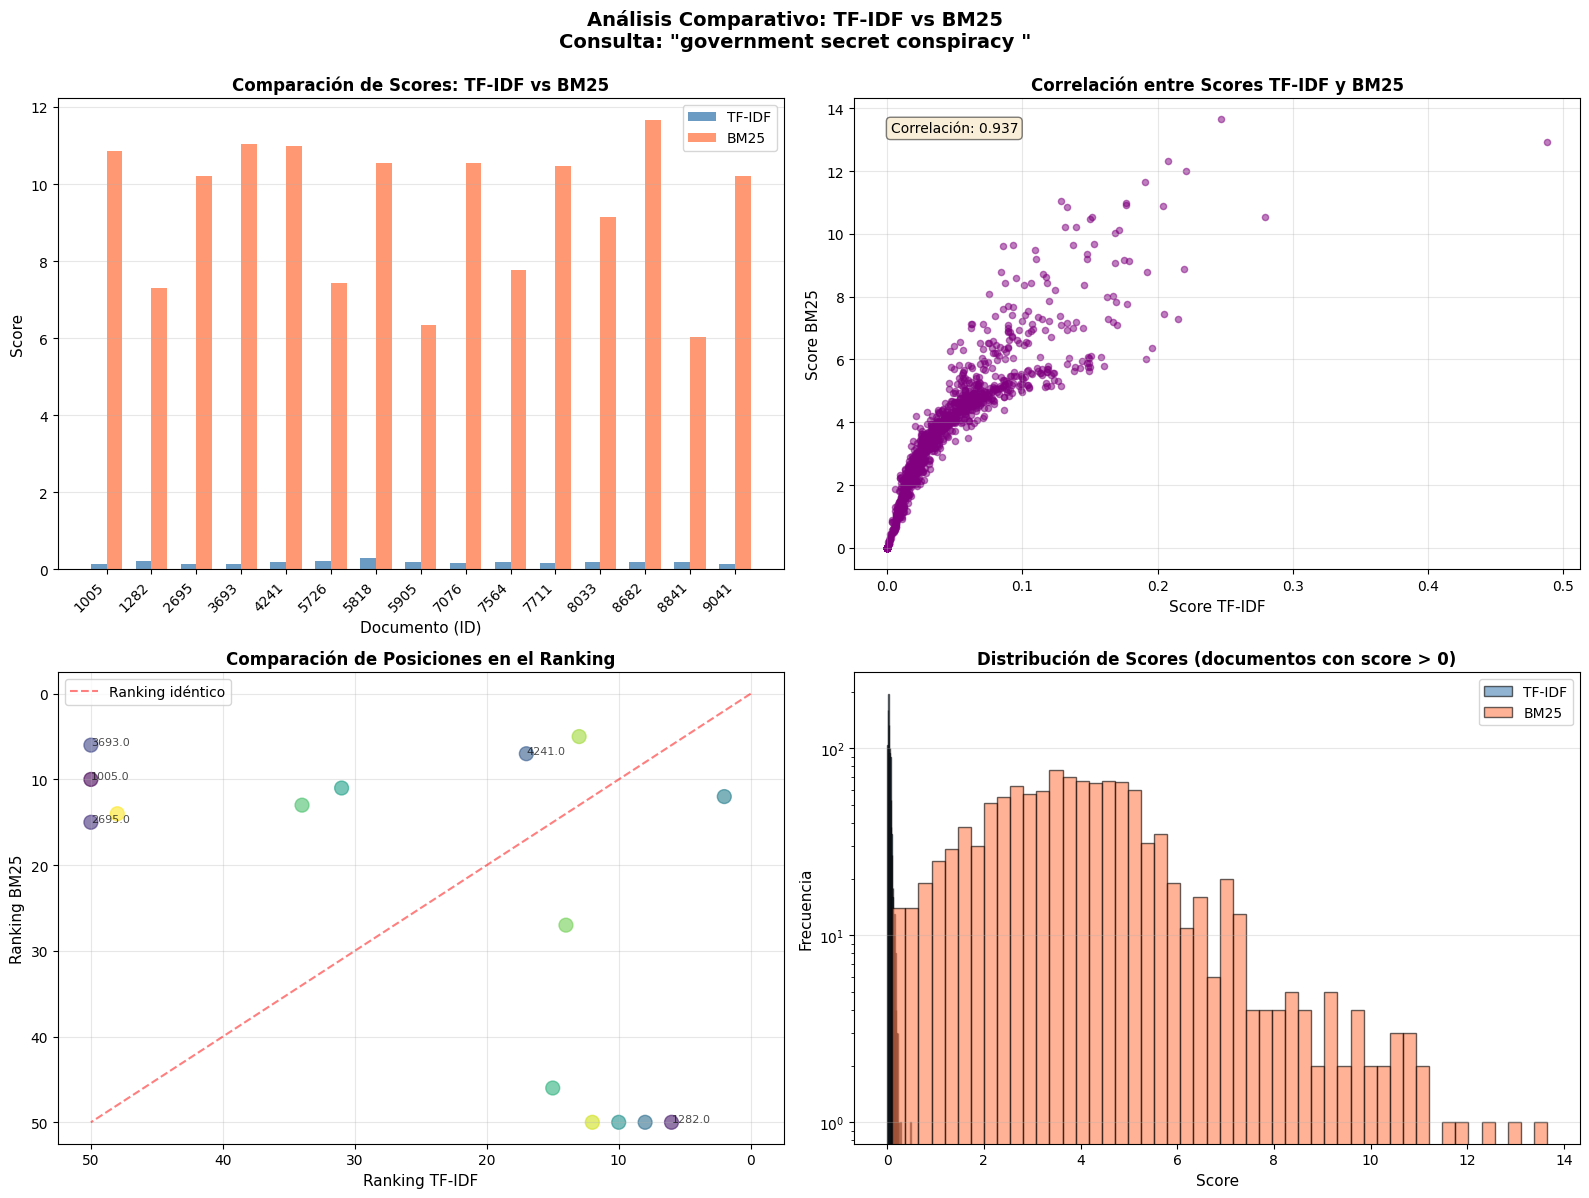

In [30]:

print("COMPARACIÓN VISUAL TF-IDF VS BM25")
# Tomar los documentos que aparecen en el top 15 de cualquiera de los dos modelos
top_n_visual = 15
top_docs_tfidf = ranking_tfidf[:top_n_visual]
top_docs_bm25 = ranking_bm25_indices[:top_n_visual]
docs_para_visualizar = sorted(list(set(top_docs_tfidf) | set(top_docs_bm25)))[:top_n_visual]

# Obtener scores para estos documentos
scores_vis_tfidf = scores_tfidf[docs_para_visualizar]
scores_vis_bm25 = scores_bm25[docs_para_visualizar]

# Crear DataFrame comparativo
df_comparacion = pd.DataFrame({
    'Doc_ID': docs_para_visualizar,
    'Score_TFIDF': scores_vis_tfidf,
    'Score_BM25': scores_vis_bm25,
    'Rank_TFIDF': [np.where(ranking_tfidf == doc)[0][0] + 1 if doc in ranking_tfidf[:50] else 50
                   for doc in docs_para_visualizar],
    'Rank_BM25': [np.where(ranking_bm25_indices == doc)[0][0] + 1 if doc in ranking_bm25_indices[:50] else 50
                  for doc in docs_para_visualizar]
})

print("\nTabla comparativa de scores:")
print(df_comparacion.to_string(index=False))

# GRÁFICO 1: Barras comparativas de scores

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Subplot 1: Comparación de scores (barras lado a lado)
x_pos = np.arange(len(docs_para_visualizar))
width = 0.35

axes[0, 0].bar(x_pos - width/2, scores_vis_tfidf, width,
               label='TF-IDF', alpha=0.8, color='steelblue')
axes[0, 0].bar(x_pos + width/2, scores_vis_bm25, width,
               label='BM25', alpha=0.8, color='coral')
axes[0, 0].set_xlabel('Documento (ID)', fontsize=11)
axes[0, 0].set_ylabel('Score', fontsize=11)
axes[0, 0].set_title('Comparación de Scores: TF-IDF vs BM25', fontsize=12, fontweight='bold')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(docs_para_visualizar, rotation=45, ha='right')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Subplot 2: Scatter plot de correlación
axes[0, 1].scatter(scores_tfidf, scores_bm25, alpha=0.5, s=20, color='purple')
axes[0, 1].set_xlabel('Score TF-IDF', fontsize=11)
axes[0, 1].set_ylabel('Score BM25', fontsize=11)
axes[0, 1].set_title('Correlación entre Scores TF-IDF y BM25', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Calcular y mostrar correlación
correlation = np.corrcoef(scores_tfidf, scores_bm25)[0, 1]
axes[0, 1].text(0.05, 0.95, f'Correlación: {correlation:.3f}',
                transform=axes[0, 1].transAxes, fontsize=10,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Subplot 3: Comparación de rankings
axes[1, 0].scatter(df_comparacion['Rank_TFIDF'], df_comparacion['Rank_BM25'],
                   s=100, alpha=0.6, c=range(len(df_comparacion)), cmap='viridis')
axes[1, 0].plot([0, 50], [0, 50], 'r--', alpha=0.5, label='Ranking idéntico')
axes[1, 0].set_xlabel('Ranking TF-IDF', fontsize=11)
axes[1, 0].set_ylabel('Ranking BM25', fontsize=11)
axes[1, 0].set_title('Comparación de Posiciones en el Ranking', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].invert_yaxis()
axes[1, 0].invert_xaxis()

# Añadir etiquetas a algunos puntos
for idx, row in df_comparacion.head(5).iterrows():
    axes[1, 0].annotate(f"{row['Doc_ID']}",
                        (row['Rank_TFIDF'], row['Rank_BM25']),
                        fontsize=8, alpha=0.7)

# Subplot 4: Distribución de scores
axes[1, 1].hist(scores_tfidf[scores_tfidf > 0], bins=50, alpha=0.6,
                label='TF-IDF', color='steelblue', edgecolor='black')
axes[1, 1].hist(scores_bm25[scores_bm25 > 0], bins=50, alpha=0.6,
                label='BM25', color='coral', edgecolor='black')
axes[1, 1].set_xlabel('Score', fontsize=11)
axes[1, 1].set_ylabel('Frecuencia', fontsize=11)
axes[1, 1].set_title('Distribución de Scores (documentos con score > 0)',
                     fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].set_yscale('log')

plt.suptitle(f'Análisis Comparativo: TF-IDF vs BM25\nConsulta: "{consulta_ejemplo}"',
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('comparacion_completa_tfidf_bm25.png', dpi=300, bbox_inches='tight')
plt.show()



In [33]:
# Análisis de diferencias
print("\n" + "="*70)
print("ANÁLISIS: ¿QUÉ DOCUMENTOS OBTIENEN SCORES MÁS ALTOS?")
print("="*70)

# Documentos con mayor score en TF-IDF
top_5_tfidf = ranking_tfidf[:5]
print("\nTop 5 documentos con mayor score TF-IDF:")
for i, doc_id in enumerate(top_5_tfidf):
    print(f"   {i+1}. Doc {doc_id}: TF-IDF={scores_tfidf[doc_id]:.4f}, "
          f"BM25={scores_bm25[doc_id]:.4f}, Longitud={len(docs_procesados[doc_id])} tokens")

# Documentos con mayor score en BM25
top_5_bm25 = ranking_bm25_indices[:5]
print("\nTop 5 documentos con mayor score BM25:")
for i, doc_id in enumerate(top_5_bm25):
    print(f"   {i+1}. Doc {doc_id}: BM25={scores_bm25[doc_id]:.4f}, "
          f"TF-IDF={scores_tfidf[doc_id]:.4f}, Longitud={len(docs_procesados[doc_id])} tokens")

# Análisis de diferencias

print("¿A QUÉ SE DEBEN LAS DIFERENCIAS?")

print(""" FACTORES QUE EXPLICAN LAS DIFERENCIAS:

1. TRATAMIENTO DE LA LONGITUD DEL DOCUMENTO:
   • TF-IDF: Normalización L2 (norma euclidiana)
     → Penaliza implícitamente documentos largos
   • BM25: Normalización explícita con parámetro 'b'
     → Control más fino de la penalización por longitud

   ➜ Documentos largos tienden a obtener scores relativamente más altos en BM25

2. SATURACIÓN DE FRECUENCIA DE TÉRMINOS:
   • TF-IDF: Peso logarítmico o lineal de TF
     → Crecimiento continuo con la frecuencia
   • BM25: Saturación asintótica con parámetro k1
     → El impacto de TF se estabiliza en valores altos

   ➜ Términos muy frecuentes no dominan tanto en BM25

3. CÁLCULO DEL IDF:
   • TF-IDF: IDF = log(N / df)
   • BM25: IDF = log((N - df + 0.5) / (df + 0.5) + 1)

   ➜ BM25 usa una variante probabilística del IDF

4. SIMILITUD COSENO vs SUMA DE SCORES:
   • TF-IDF: Usa similitud coseno (normalización angular)
   • BM25: Suma directa de scores (sin normalización angular)

   ➜ Diferentes conceptos de "relevancia"
""")

# Análisis cuantitativo de longitudes
docs_top_tfidf = top_5_tfidf
docs_top_bm25 = top_5_bm25

longitudes_top_tfidf = [len(docs_procesados[d]) for d in docs_top_tfidf]
longitudes_top_bm25 = [len(docs_procesados[d]) for d in docs_top_bm25]

print(f"\nANÁLISIS DE LONGITUDES:")
print(f"   Longitud promedio Top 5 TF-IDF: {np.mean(longitudes_top_tfidf):.2f} tokens")
print(f"   Longitud promedio Top 5 BM25:   {np.mean(longitudes_top_bm25):.2f} tokens")
print(f"   Longitud promedio del corpus:   {longitud_media:.2f} tokens")


ANÁLISIS: ¿QUÉ DOCUMENTOS OBTIENEN SCORES MÁS ALTOS?

Top 5 documentos con mayor score TF-IDF:
   1. Doc 15813: TF-IDF=0.4880, BM25=12.9144, Longitud=5 tokens
   2. Doc 5818: TF-IDF=0.2797, BM25=10.5332, Longitud=69 tokens
   3. Doc 17608: TF-IDF=0.2468, BM25=13.6502, Longitud=22 tokens
   4. Doc 11308: TF-IDF=0.2210, BM25=12.0180, Longitud=170 tokens
   5. Doc 15412: TF-IDF=0.2198, BM25=8.8925, Longitud=23 tokens

Top 5 documentos con mayor score BM25:
   1. Doc 17608: BM25=13.6502, TF-IDF=0.2468, Longitud=22 tokens
   2. Doc 15813: BM25=12.9144, TF-IDF=0.4880, Longitud=5 tokens
   3. Doc 18575: BM25=12.3222, TF-IDF=0.2079, Longitud=59 tokens
   4. Doc 11308: BM25=12.0180, TF-IDF=0.2210, Longitud=170 tokens
   5. Doc 8682: BM25=11.6541, TF-IDF=0.1904, Longitud=99 tokens
¿A QUÉ SE DEBEN LAS DIFERENCIAS?
 FACTORES QUE EXPLICAN LAS DIFERENCIAS:

1. TRATAMIENTO DE LA LONGITUD DEL DOCUMENTO:
   • TF-IDF: Normalización L2 (norma euclidiana)
     → Penaliza implícitamente documentos largos
